In [ ]:
pip install geopandas

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [6]:
import geopandas as gpd
import os

# Load the low-res world dataset
world = gpd.read_file("countries/ne_110m_admin_0_countries.shp")
# Filter for Canada
canada = world[world['NAME'] == 'Canada']
canada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 3 to 3
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 1.2+ KB


In [7]:
from shapely.geometry import Point

# Example cities with (lon, lat)
city_data = {
    'City': ['Calgary', 'Toronto', 'Vancouver', 'Seattle', 'Boston'],
    'geometry': [
        Point(-114.0719, 51.0447),  # Calgary
        Point(-79.3832, 43.6532),   # Toronto
        Point(-123.1216, 49.2827),  # Vancouver
        Point(-122.3321, 47.6062),  # Seattle (not in Canada)
        Point(-71.05708, 42.3611)   # Boston (not in Canada)
    ]
}

cities_gdf = gpd.GeoDataFrame(city_data, crs='EPSG:4326')

In [8]:
cities_in_canada = cities_gdf[cities_gdf.within(canada.union_all())]

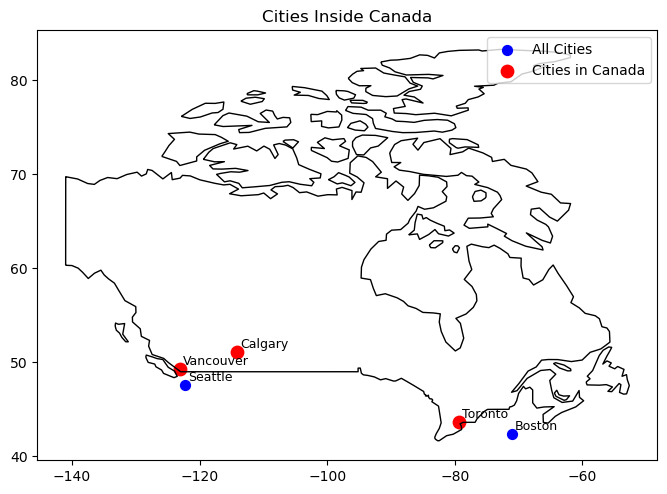

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Canada boundary
canada.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot all cities (gray)
cities_gdf.plot(ax=ax, color='blue', markersize=50, label='All Cities')

# Highlight cities inside Canada (red)
cities_in_canada.plot(ax=ax, color='red', markersize=80, label='Cities in Canada')

# Add labels
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf['City']):
    ax.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.legend()
plt.title("Cities Inside Canada")
plt.show()